In [4]:
#import packages
import flopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os


#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


np.set_printoptions(threshold=np.inf)

#jupyter specific--included to show plots in notebook
%matplotlib inline 

flopy is installed in c:\users\davem\appdata\local\programs\python\python38-32\lib\site-packages\flopy


In [19]:
ensembles = [
 [3,3,3,3,3,3,3],
# [3,3,1,3,3,3,3], 
# [3,3,3,1,3,3,3],
# [3,3,3,3,3,3,1],
# [2,2,3,3,2,2,3],
# [2,2,1,3,2,2,3],
# [2,2,3,1,2,2,3],
# [2,2,3,3,2,2,1],
# [2,2,1,1,2,2,1],
[1,1,1,1,1,1,1]]

#ensemble_num = ensembles[0]#change ensemble here
#print(ensemble_num)
name = "ensemble_"
well_row = 29
well_col = 37
well_loc = (0,well_row, well_col)

head = np.tile([],len(ensembles))
head_ts = []
#print(head)
for i in range(len(ensembles)):
    name = "ensemble_"   #Create the file name from list 
    for k in range(len(ensembles[i])):
        string = str(ensembles[i][k])
        name = name + string   
                   
#     head[i] = {}
#     leakage[i] = {}
#     fff[i] = {}
#     stor[i] = {}
#     recharge[i] = {}
#     et[i] = {}
#     frf[i] = {}
    headobj = flopy.utils.binaryfile.HeadFile(name+'.hds')
    budgobj = flopy.utils.binaryfile.CellBudgetFile(name+'.cbc')
    head_ts.append(headobj.get_ts(well_loc))
    #print(budgobj.get_unique_record_names())

#     for stress_per, time in enumerate(times): #iterate through times at end of each stress period
#         head[i]['sp%s'%(stress_per)] = headobj.get_data(totim=time) #append heads to head list for ea stress per
#        leakage['sp%s'%(stress_per)] = budgobj.get_data(text='RIVER LEAKAGE',totim=time) #append right face flow to frf list for ea stress per
#         fff['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW FRONT FACE',totim=time) #append front face flow to fff list for ea stress per
#         frf['sp%s'%(stress_per)] = budgobj.get_data(text='flow right face', totim=time)
#         stor['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
#         recharge['sp%s'%(stress_per)] = budgobj.get_data(text='RECHARGE', totim=time) 
#         et['sp%s'%(stress_per)] = budgobj.get_data(text='ET', totim=time) 

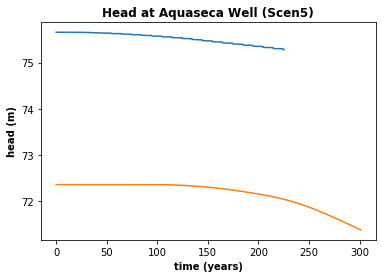

In [20]:
# Aquaseca well
nrow = 50 #number of rows
ncol = 50 #number of columns
dx= 1000 #width of grid cells in x direction 
dy= 1000 #width of grid cells in y direction 

well_row = 29
well_col = 37
well_loc = (0,well_row, well_col)

well2_xy= [25000, 25000] #xy location of well 
well2_row = np.floor((nrow)-(well2_xy[1]/dy)) #convert the y location to a row
well2_col=np.floor(well2_xy[0]/dx)-1 #convert the x location to a column
well2_loc = (0,well2_row, well2_col)

well3_xy= [12500, 12500] #xy location of well 
well3_row = np.floor((nrow)-(well3_xy[1]/dy)) #convert the y location to a row
well3_col=np.floor(well3_xy[0]/dx) #convert the x location to a column
well3_loc = (0,well3_row, well3_col)

well4_row = 38 
well4_col = 12 
well4_loc = (0,well4_row, well4_col)

cell_id1 = well_loc #cell at the center of the ag area
#time_series1 = headobj.get_ts(cell_id1) #get the time series using flopy

#create firt plot  
plt.subplot(1, 1, 1)
plt.title("Head at Aquaseca Well (Scen5)",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
for j in range(len(ensembles)):
    plt.plot(head_ts[j][:, 0]/360, head_ts[j][:, 1]) #plot the time series with points at each record

#plt.savefig("Head_Aqua5.png",dpi=600)
plt.show()
